In [39]:
import os
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Directory for saved figures (relative to this notebook)
FIG_DIR = "figures"
os.makedirs(FIG_DIR, exist_ok=True)

In [40]:
# Load JSON files
baseline_new = "baseline_classic_eval.json"
samplers_new = "samplers_classic_eval.json"
all_old = "all_old_classic_eval.json"

with open(baseline_new, 'r') as f:
    baseline_new = json.load(f)

with open(samplers_new, 'r') as f:
    samplers_new = json.load(f)

with open(all_old, 'r') as f:
    all_old = json.load(f)

In [41]:
def flatten_json_to_dataframe(json_data, split_keys=['overall', 'train', 'val']):
    """
    Convert nested JSON evaluation results to flat wide dataframe.
    
    Args:
        json_data: Dictionary with config names as keys and nested metrics as values
        split_keys: List of nested keys to flatten with prefixes
        
    Returns:
        pd.DataFrame with one row per configuration and flattened columns
    """
    rows = []
    
    for config_name, config_data in json_data.items():
        row = {'config_name': config_name}
        
        # Extract top-level metadata
        for key in ['model_path', 'model_name', 'temperature', 'top_k']:
            row[key] = config_data.get(key)
        
        # Flatten nested metrics with prefixes
        for split_key in split_keys:
            if split_key in config_data and isinstance(config_data[split_key], dict):
                for metric, value in config_data[split_key].items():
                    row[f'{split_key}_{metric}'] = value
        
        rows.append(row)
    
    return pd.DataFrame(rows)

In [42]:
# Convert all three JSONs to dataframes
df_baseline = flatten_json_to_dataframe(baseline_new)
df_samplers = flatten_json_to_dataframe(samplers_new)
df_old = flatten_json_to_dataframe(all_old)

print(f"df_baseline: {df_baseline.shape}")
print(f"df_samplers: {df_samplers.shape}")
print(f"df_old: {df_old.shape}")

df_baseline: (8, 29)
df_samplers: (16, 29)
df_old: (12, 29)


In [43]:
# Add source labels and combine all dataframes
df_baseline['source'] = 'baseline_new'
df_samplers['source'] = 'samplers_new'
df_old['source'] = 'all_old'

df_combined = pd.concat([df_baseline, df_samplers, df_old], axis=0, ignore_index=True)

print(f"Combined DataFrame: {df_combined.shape}")
print(f"\nBreakdown by source:")
print(df_combined['source'].value_counts())

Combined DataFrame: (36, 30)

Breakdown by source:
source
samplers_new    16
all_old         12
baseline_new     8
Name: count, dtype: int64


In [7]:
# Display combined dataframe
df_combined

,config_name,model_path,model_name,temperature,top_k,overall_num_samples,overall_num_prompts_not_found,overall_bleu,overall_rouge1,overall_rouge2,...,train_avg_text_length,val_num_samples,val_num_prompts_not_found,val_bleu,val_rouge1,val_rouge2,val_rougeL,val_perplexity,val_avg_text_length,source
0,baseline_temp0.3_topk10_samples10_baseline,/content/drive/MyDrive/baseline/baseline_model...,baseline,0.3,10,4,1,0.237451,0.726575,0.473880,...,635.666667,1,1,0.239044,0.678112,0.466544,0.377682,25.366802,632.00,baseline_new
1,baseline_temp0.3_topk10_samples30_baseline,/content/drive/MyDrive/baseline/baseline_model...,baseline,0.3,10,4,1,0.244308,0.730255,0.485750,...,635.666667,1,1,0.243607,0.732066,0.472683,0.397302,33.731365,632.00,baseline_new
2,baseline_temp0.3_topk50_samples10_baseline,/content/drive/MyDrive/baseline/baseline_model...,baseline,0.3,50,4,1,0.238666,0.726856,0.482101,...,635.666667,1,1,0.257973,0.735745,0.513198,0.396076,40.893364,632.00,baseline_new
3,baseline_temp0.3_topk50_samples30_baseline,/content/drive/MyDrive/baseline/baseline_model...,baseline,0.3,50,4,1,0.245075,0.746812,0.496840,...,635.666667,1,1,0.223985,0.743102,0.460405,0.399755,97.425339,632.00,baseline_new
4,baseline_temp0.8_topk10_samples10_baseline,/content/drive/MyDrive/baseline/baseline_model...,baseline,0.8,10,4,1,0.274682,0.756265,0.561419,...,635.666667,1,1,0.279878,0.752912,0.563536,0.393624,197.348694,632.00,baseline_new
5,baseline_temp0.8_topk10_samples30_baseline,/content/drive/MyDrive/baseline/baseline_model...,baseline,0.8,10,4,1,0.275646,0.748615,0.553484,...,635.666667,1,1,0.281551,0.740650,0.546347,0.400981,96.667076,632.00,baseline_new
6,baseline_temp0.8_topk50_samples10_baseline,/content/drive/MyDrive/baseline/baseline_model...,baseline,0.8,50,4,1,0.285397,0.757813,0.581048,...,635.666667,1,1,0.313707,0.765175,0.616329,0.407112,330.808411,632.00,baseline_new
7,baseline_temp0.8_topk50_samples30_baseline,/content/drive/MyDrive/baseline/baseline_model...,baseline,0.8,50,4,1,0.263786,0.743997,0.548213,...,635.666667,1,1,0.281055,0.712446,0.561080,0.372777,92.299103,632.00,baseline_new
8,baoa_temp0.3_topk10_samples10_run_20251224-145920,/content/drive/MyDrive/samplers/baoa_sampler/r...,baoa,0.3,10,4,1,0.233384,0.718867,0.470310,...,635.666667,1,1,0.231327,0.717351,0.472683,0.391171,50.447792,632.00,samplers_new
9,baoa_temp0.3_topk50_samples10_run_20251224-145920,/content/drive/MyDrive/samplers/baoa_sampler/r...,baoa,0.3,50,4,1,0.260473,0.746146,0.511450,...,635.666667,1,1,0.274579,0.754139,0.529159,0.419375,59.917664,632.00,samplers_new


In [44]:
# Set step_size by dataset/source
# - new baoa/sghmc (samplers_new): '5e-06'
# - baseline: 'na'
# - old baoa/sghmc (all_old): '1e-06'

conditions = [
    df_combined['source'].eq('samplers_new'),
    df_combined['source'].eq('baseline_new'),
    df_combined['source'].eq('all_old'),
]
choices = ['5e-06', 'na', '1e-06']

df_combined['step_size'] = np.select(conditions, choices, default='na')

# Quick sanity checks
print('Step size breakdown:')
print(df_combined.groupby(['source','step_size']).size())

df_combined.head()

Step size breakdown:
source        step_size
all_old       1e-06        12
baseline_new  na            8
samplers_new  5e-06        16
dtype: int64


,config_name,model_path,model_name,temperature,top_k,overall_num_samples,overall_num_prompts_not_found,overall_bleu,overall_rouge1,overall_rouge2,...,val_num_samples,val_num_prompts_not_found,val_bleu,val_rouge1,val_rouge2,val_rougeL,val_perplexity,val_avg_text_length,source,step_size
0,baseline_temp0.3_topk10_samples10_baseline,/content/drive/MyDrive/baseline/baseline_model...,baseline,0.3,10,4,1,0.237451,0.726575,0.473880,...,1,1,0.239044,0.678112,0.466544,0.377682,25.366802,632.0,baseline_new,na
1,baseline_temp0.3_topk10_samples30_baseline,/content/drive/MyDrive/baseline/baseline_model...,baseline,0.3,10,4,1,0.244308,0.730255,0.485750,...,1,1,0.243607,0.732066,0.472683,0.397302,33.731365,632.0,baseline_new,na
2,baseline_temp0.3_topk50_samples10_baseline,/content/drive/MyDrive/baseline/baseline_model...,baseline,0.3,50,4,1,0.238666,0.726856,0.482101,...,1,1,0.257973,0.735745,0.513198,0.396076,40.893364,632.0,baseline_new,na
3,baseline_temp0.3_topk50_samples30_baseline,/content/drive/MyDrive/baseline/baseline_model...,baseline,0.3,50,4,1,0.245075,0.746812,0.496840,...,1,1,0.223985,0.743102,0.460405,0.399755,97.425339,632.0,baseline_new,na
4,baseline_temp0.8_topk10_samples10_baseline,/content/drive/MyDrive/baseline/baseline_model...,baseline,0.8,10,4,1,0.274682,0.756265,0.561419,...,1,1,0.279878,0.752912,0.563536,0.393624,197.348694,632.0,baseline_new,na


In [32]:
df_combined

,config_name,model_path,model_name,temperature,top_k,overall_num_samples,overall_num_prompts_not_found,overall_bleu,overall_rouge1,overall_rouge2,...,val_num_samples,val_num_prompts_not_found,val_bleu,val_rouge1,val_rouge2,val_rougeL,val_perplexity,val_avg_text_length,source,step_size
0,baseline_temp0.3_topk10_samples10_baseline,/content/drive/MyDrive/baseline/baseline_model...,baseline,0.3,10,4,1,0.237451,0.726575,0.473880,...,1,1,0.239044,0.678112,0.466544,0.377682,25.366802,632.00,baseline_new,na
1,baseline_temp0.3_topk10_samples30_baseline,/content/drive/MyDrive/baseline/baseline_model...,baseline,0.3,10,4,1,0.244308,0.730255,0.485750,...,1,1,0.243607,0.732066,0.472683,0.397302,33.731365,632.00,baseline_new,na
2,baseline_temp0.3_topk50_samples10_baseline,/content/drive/MyDrive/baseline/baseline_model...,baseline,0.3,50,4,1,0.238666,0.726856,0.482101,...,1,1,0.257973,0.735745,0.513198,0.396076,40.893364,632.00,baseline_new,na
3,baseline_temp0.3_topk50_samples30_baseline,/content/drive/MyDrive/baseline/baseline_model...,baseline,0.3,50,4,1,0.245075,0.746812,0.496840,...,1,1,0.223985,0.743102,0.460405,0.399755,97.425339,632.00,baseline_new,na
4,baseline_temp0.8_topk10_samples10_baseline,/content/drive/MyDrive/baseline/baseline_model...,baseline,0.8,10,4,1,0.274682,0.756265,0.561419,...,1,1,0.279878,0.752912,0.563536,0.393624,197.348694,632.00,baseline_new,na
5,baseline_temp0.8_topk10_samples30_baseline,/content/drive/MyDrive/baseline/baseline_model...,baseline,0.8,10,4,1,0.275646,0.748615,0.553484,...,1,1,0.281551,0.740650,0.546347,0.400981,96.667076,632.00,baseline_new,na
6,baseline_temp0.8_topk50_samples10_baseline,/content/drive/MyDrive/baseline/baseline_model...,baseline,0.8,50,4,1,0.285397,0.757813,0.581048,...,1,1,0.313707,0.765175,0.616329,0.407112,330.808411,632.00,baseline_new,na
7,baseline_temp0.8_topk50_samples30_baseline,/content/drive/MyDrive/baseline/baseline_model...,baseline,0.8,50,4,1,0.263786,0.743997,0.548213,...,1,1,0.281055,0.712446,0.561080,0.372777,92.299103,632.00,baseline_new,na
8,baoa_temp0.3_topk10_samples10_run_20251224-145920,/content/drive/MyDrive/samplers/baoa_sampler/r...,baoa,0.3,10,4,1,0.233384,0.718867,0.470310,...,1,1,0.231327,0.717351,0.472683,0.391171,50.447792,632.00,samplers_new,5e-06
9,baoa_temp0.3_topk50_samples10_run_20251224-145920,/content/drive/MyDrive/samplers/baoa_sampler/r...,baoa,0.3,50,4,1,0.260473,0.746146,0.511450,...,1,1,0.274579,0.754139,0.529159,0.419375,59.917664,632.00,samplers_new,5e-06


In [45]:
# Compare effect of step_size on metrics (averages)
# Required columns: step_size, model, avg_* for train/val/overall BLEU/ROUGE/Perplexity

# Ensure 'model' column exists for clarity
df_combined['model'] = df_combined['model_name']

# Select relevant metric columns
metric_cols = [
    'overall_bleu','overall_rouge1','overall_rouge2','overall_rougeL','overall_perplexity',
    'train_bleu','train_rouge1','train_rouge2','train_rougeL','train_perplexity',
    'val_bleu','val_rouge1','val_rouge2','val_rougeL','val_perplexity',
]

# Build aggregation dict
agg_map = {col: 'mean' for col in metric_cols}

# Group by step_size and model, averaging all metrics
comparison = (
    df_combined
      .groupby(['step_size','model'], dropna=False)
      .agg(agg_map)
      .reset_index()
)

# Rename columns to prefixed avg_*
rename_map = {c: f"avg_{c}" for c in metric_cols}
comparison = comparison.rename(columns=rename_map)

# Order columns
ordered_cols = ['step_size','model'] + list(rename_map.values())
comparison = comparison[ordered_cols]

print(f"Comparison shape: {comparison.shape}")
comparison.head(20)

Comparison shape: (5, 17)


,step_size,model,avg_overall_bleu,avg_overall_rouge1,avg_overall_rouge2,avg_overall_rougeL,avg_overall_perplexity,avg_train_bleu,avg_train_rouge1,avg_train_rouge2,avg_train_rougeL,avg_train_perplexity,avg_val_bleu,avg_val_rouge1,avg_val_rouge2,avg_val_rougeL,avg_val_perplexity
0,1e-06,baoa,0.252313,0.741014,0.519708,0.380252,117.775511,0.248650,0.745316,0.515404,0.381882,116.860408,0.256702,0.735115,0.525550,0.378709,118.919393
1,1e-06,sghmc,0.249076,0.737670,0.515889,0.378294,187.641508,0.249383,0.744770,0.515924,0.377561,190.216854,0.248634,0.728179,0.515841,0.379333,184.422352
2,5e-06,baoa,0.256074,0.739235,0.514567,0.379733,105.735896,0.251538,0.737946,0.506838,0.373227,105.894481,0.269272,0.743102,0.537753,0.398375,105.260211
3,5e-06,sghmc,0.252249,0.741825,0.512970,0.378393,122.377468,0.249450,0.739508,0.510799,0.371451,125.405167,0.260059,0.748774,0.521639,0.398222,113.294397
4,na,baseline,0.258126,0.742148,0.522842,0.380675,125.645261,0.255600,0.745356,0.522117,0.376235,129.421154,0.265100,0.732526,0.525015,0.393164,114.317519


In [46]:
# Drop baseline rows and prepare filtered dataset
df_no_baseline = df_combined[df_combined['source'] != 'baseline_new'].copy()

# Ensure model column exists
df_no_baseline['model'] = df_no_baseline['model_name']

# Keep only step sizes of interest
valid_steps = ['1e-06','5e-06']
df_no_baseline = df_no_baseline[df_no_baseline['step_size'].isin(valid_steps)]

print(df_no_baseline['source'].value_counts())
print('Unique step sizes:', sorted(df_no_baseline['step_size'].unique()))
df_no_baseline.head()

source
samplers_new    16
all_old         12
Name: count, dtype: int64
Unique step sizes: ['1e-06', '5e-06']


,config_name,model_path,model_name,temperature,top_k,overall_num_samples,overall_num_prompts_not_found,overall_bleu,overall_rouge1,overall_rouge2,...,val_num_prompts_not_found,val_bleu,val_rouge1,val_rouge2,val_rougeL,val_perplexity,val_avg_text_length,source,step_size,model
8,baoa_temp0.3_topk10_samples10_run_20251224-145920,/content/drive/MyDrive/samplers/baoa_sampler/r...,baoa,0.3,10,4,1,0.233384,0.718867,0.470310,...,1,0.231327,0.717351,0.472683,0.391171,50.447792,632.0,samplers_new,5e-06,baoa
9,baoa_temp0.3_topk50_samples10_run_20251224-145920,/content/drive/MyDrive/samplers/baoa_sampler/r...,baoa,0.3,50,4,1,0.260473,0.746146,0.511450,...,1,0.274579,0.754139,0.529159,0.419375,59.917664,632.0,samplers_new,5e-06,baoa
10,baoa_temp0.3_topk10_samples30_run_20251224-145920,/content/drive/MyDrive/samplers/baoa_sampler/r...,baoa,0.3,10,4,1,0.244376,0.730936,0.485558,...,1,0.259420,0.714899,0.509515,0.387492,28.594395,632.0,samplers_new,5e-06,baoa
11,baoa_temp0.8_topk10_samples10_run_20251224-145920,/content/drive/MyDrive/samplers/baoa_sampler/r...,baoa,0.8,10,4,1,0.272899,0.752607,0.544857,...,1,0.282759,0.743102,0.552486,0.392397,98.911018,632.0,samplers_new,5e-06,baoa
12,baoa_temp0.3_topk50_samples30_run_20251224-145920,/content/drive/MyDrive/samplers/baoa_sampler/r...,baoa,0.3,50,4,1,0.221201,0.712120,0.441248,...,1,0.229179,0.734519,0.449355,0.408338,57.450043,632.0,samplers_new,5e-06,baoa


Saved figure to figures\overall_metrics_by_step_model.png


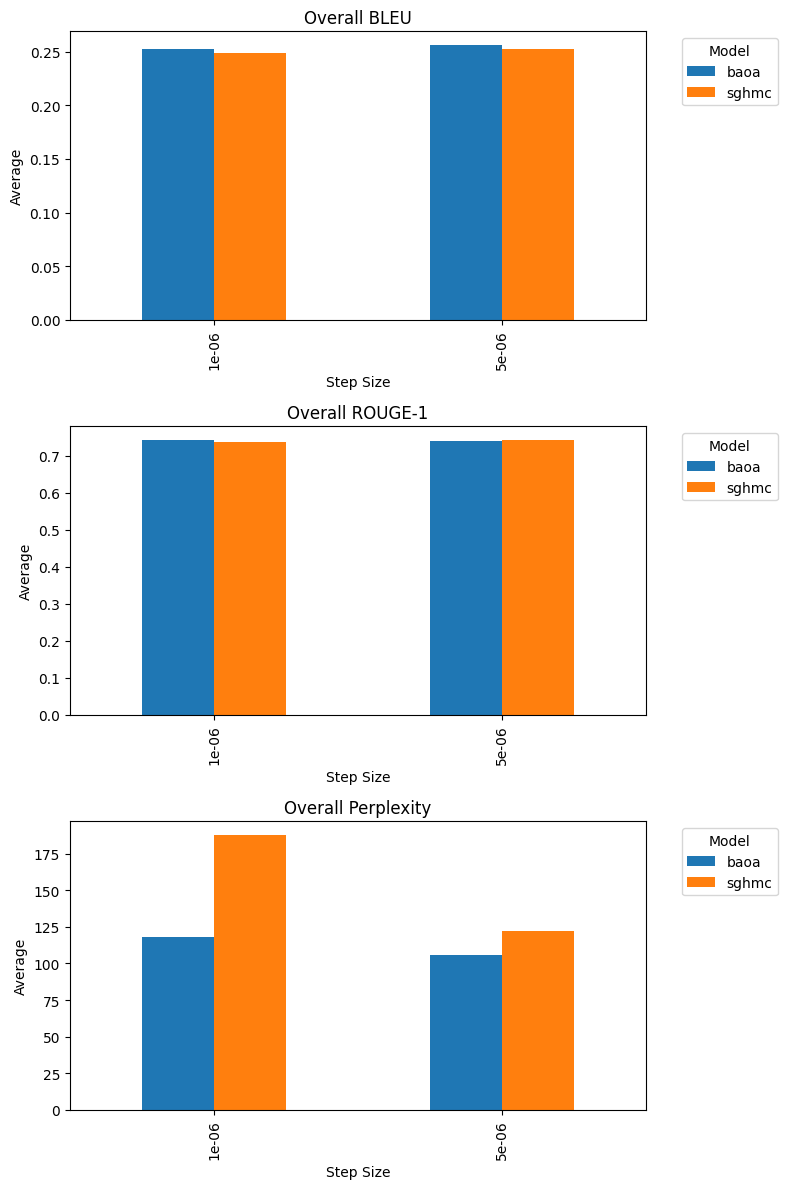

In [47]:
# Small number of plots: overall BLEU, ROUGE-1, Perplexity by step_size and model
import matplotlib.pyplot as plt

metrics_to_plot = [
    ('overall_bleu', 'Overall BLEU'),
    ('overall_rouge1', 'Overall ROUGE-1'),
    ('overall_perplexity', 'Overall Perplexity'),
]

step_order = ['1e-06','5e-06']

fig, axes = plt.subplots(nrows=len(metrics_to_plot), ncols=1, figsize=(8, 12))
for ax, (metric, title) in zip(axes, metrics_to_plot):
    pivot = (df_no_baseline
             .pivot_table(index='step_size', columns='model', values=metric, aggfunc='mean')
             .reindex(step_order))
    pivot.plot(kind='bar', ax=ax)
    ax.set_title(title)
    ax.set_xlabel('Step Size')
    ax.set_ylabel('Average')
    ax.legend(title='Model', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
# Save combined overall metrics figure
overall_fig_path = os.path.join(FIG_DIR, 'overall_metrics_by_step_model.png')
fig.savefig(overall_fig_path, dpi=200, bbox_inches='tight')
print(f"Saved figure to {overall_fig_path}")
plt.show()

Saved figure to figures\overfitting_by_step_model.png


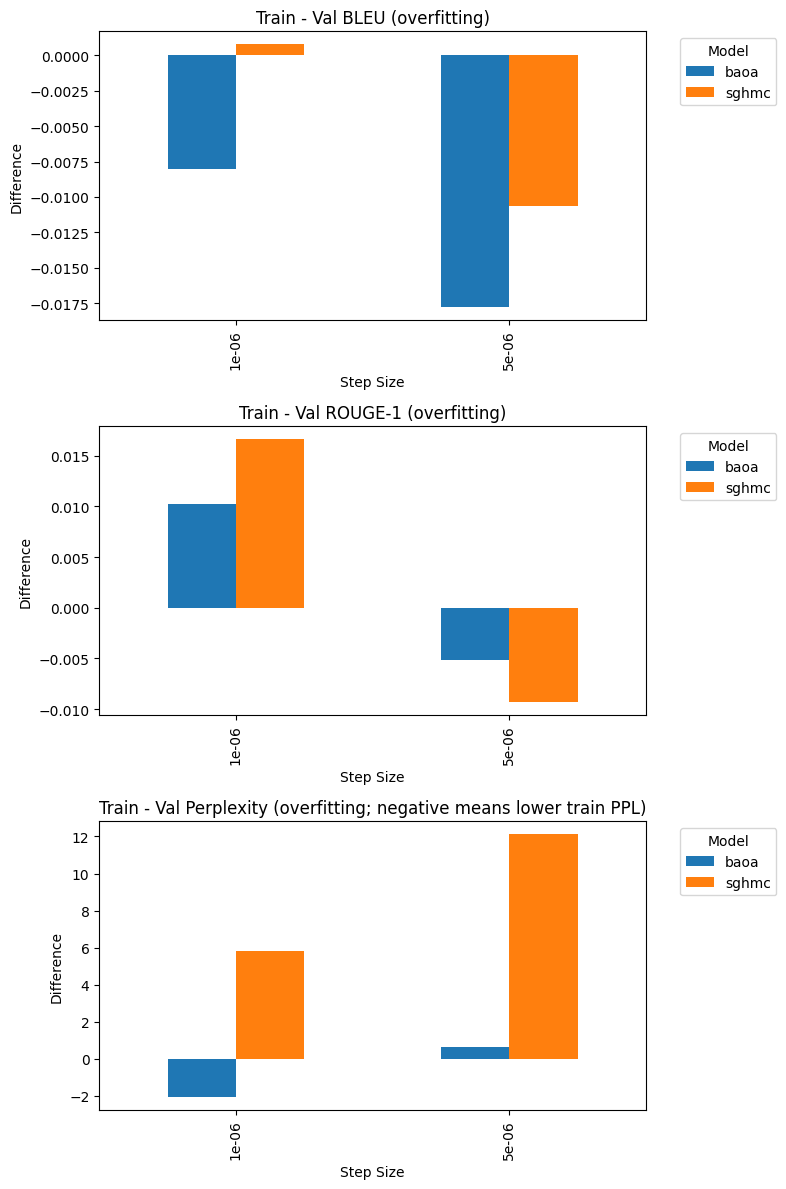

In [48]:
# Overfitting plots: train - val (BLEU, ROUGE-1, Perplexity) by step_size and model
# Positive BLEU/ROUGE deltas indicate train > val (more overfitting); Perplexity deltas can be negative if train PPL < val PPL.

# Aggregate means per step_size and model
agg_cols = {
    'train_bleu': 'mean', 'val_bleu': 'mean',
    'train_rouge1': 'mean', 'val_rouge1': 'mean',
    'train_perplexity': 'mean', 'val_perplexity': 'mean',
}

overfit = (
    df_no_baseline
      .groupby(['step_size','model'], dropna=False)
      .agg(agg_cols)
      .reset_index()
)

overfit['overfit_bleu'] = overfit['train_bleu'] - overfit['val_bleu']
overfit['overfit_rouge1'] = overfit['train_rouge1'] - overfit['val_rouge1']
overfit['overfit_perplexity'] = overfit['train_perplexity'] - overfit['val_perplexity']

# Plot
import matplotlib.pyplot as plt
step_order = ['1e-06','5e-06']
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(8, 12))

plots = [
    ('overfit_bleu', 'Train - Val BLEU (overfitting)'),
    ('overfit_rouge1', 'Train - Val ROUGE-1 (overfitting)'),
    ('overfit_perplexity', 'Train - Val Perplexity (overfitting; negative means lower train PPL)'),
]

for ax, (col, title) in zip(axes, plots):
    pivot = (
        overfit
        .pivot(index='step_size', columns='model', values=col)
        .reindex(step_order)
    )
    pivot.plot(kind='bar', ax=ax)
    ax.set_title(title)
    ax.set_xlabel('Step Size')
    ax.set_ylabel('Difference')
    ax.legend(title='Model', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
# Save combined overfitting figure
overfit_fig_path = os.path.join(FIG_DIR, 'overfitting_by_step_model.png')
fig.savefig(overfit_fig_path, dpi=200, bbox_inches='tight')
print(f"Saved figure to {overfit_fig_path}")
plt.show()

In [49]:
# Compute numeric summary of step size effect (non-baseline only)
metrics = ['overall_bleu','overall_rouge1','overall_rouge2','overall_rougeL','overall_perplexity']
agg = (df_no_baseline
       .groupby('step_size')[metrics]
       .mean()
       .reindex(['1e-06','5e-06']))

# Safeguard in case a step is missing
present_steps = [s for s in ['1e-06','5e-06'] if s in agg.index]
print('Averages by step_size (overall metrics):')
print(agg.loc[present_steps])

if all(s in agg.index for s in ['1e-06','5e-06']):
    delta = agg.loc['5e-06'] - agg.loc['1e-06']
    print('\nDelta (5e-06 minus 1e-06):')
    for m in metrics:
        print(f"  {m}: {delta[m]:.4f}")
else:
    print('\nDelta not available: one of the step sizes missing.')

Averages by step_size (overall metrics):
           overall_bleu  overall_rouge1  overall_rouge2  overall_rougeL  \
step_size                                                                 
1e-06          0.250695        0.739342        0.517799        0.379273   
5e-06          0.254162        0.740530        0.513768        0.379063   

           overall_perplexity  
step_size                      
1e-06              152.708510  
5e-06              114.056682  

Delta (5e-06 minus 1e-06):
  overall_bleu: 0.0035
  overall_rouge1: 0.0012
  overall_rouge2: -0.0040
  overall_rougeL: -0.0002
  overall_perplexity: -38.6518


### Step Size Effect (Non-Baseline)

- Compared step sizes: 1e-06 vs 5e-06 (averaged across models)
- Overall metrics (5e-06 minus 1e-06):
  - BLEU: +0.0035
  - ROUGE-1: +0.0012
  - ROUGE-2: −0.0040
  - ROUGE-L: −0.0002
  - Perplexity: −38.6518

Interpretation:
- 5e-06 slightly improves BLEU and ROUGE-1 on average, with a modest decrease in ROUGE-2/ROUGE-L.
- Perplexity drops notably at 5e-06, indicating more confident predictions overall.

In [50]:
# Compute numeric summary for overfitting (train - val) across models by step_size
of_metrics = ['overfit_bleu','overfit_rouge1','overfit_perplexity']
of_agg = (
    overfit
    .groupby('step_size')[of_metrics]
    .mean()
    .reindex(['1e-06','5e-06'])
)

print('Average overfitting (train - val) by step_size:')
print(of_agg)

if all(s in of_agg.index for s in ['1e-06','5e-06']):
    of_delta = of_agg.loc['5e-06'] - of_agg.loc['1e-06']
    print('\nDelta (5e-06 minus 1e-06):')
    for m in of_metrics:
        print(f"  {m}: {of_delta[m]:.4f}")
else:
    print('\nDelta not available: one of the step sizes missing.')

# Capture formatted strings for markdown
fmt = lambda x: f"{x:.4f}" if pd.notna(x) else 'na'
mean_bleu_1e6 = fmt(of_agg.loc['1e-06','overfit_bleu']) if '1e-06' in of_agg.index else 'na'
mean_bleu_5e6 = fmt(of_agg.loc['5e-06','overfit_bleu']) if '5e-06' in of_agg.index else 'na'
mean_r1_1e6   = fmt(of_agg.loc['1e-06','overfit_rouge1']) if '1e-06' in of_agg.index else 'na'
mean_r1_5e6   = fmt(of_agg.loc['5e-06','overfit_rouge1']) if '5e-06' in of_agg.index else 'na'
mean_ppl_1e6  = fmt(of_agg.loc['1e-06','overfit_perplexity']) if '1e-06' in of_agg.index else 'na'
mean_ppl_5e6  = fmt(of_agg.loc['5e-06','overfit_perplexity']) if '5e-06' in of_agg.index else 'na'

bleu_delta = fmt((of_agg.loc['5e-06','overfit_bleu'] - of_agg.loc['1e-06','overfit_bleu'])) if all(s in of_agg.index for s in ['1e-06','5e-06']) else 'na'
r1_delta   = fmt((of_agg.loc['5e-06','overfit_rouge1'] - of_agg.loc['1e-06','overfit_rouge1'])) if all(s in of_agg.index for s in ['1e-06','5e-06']) else 'na'
ppl_delta  = fmt((of_agg.loc['5e-06','overfit_perplexity'] - of_agg.loc['1e-06','overfit_perplexity'])) if all(s in of_agg.index for s in ['1e-06','5e-06']) else 'na'

Average overfitting (train - val) by step_size:
           overfit_bleu  overfit_rouge1  overfit_perplexity
step_size                                                  
1e-06         -0.003651        0.013395            1.867759
5e-06         -0.014171       -0.007211            6.372520

Delta (5e-06 minus 1e-06):
  overfit_bleu: -0.0105
  overfit_rouge1: -0.0206
  overfit_perplexity: 4.5048


### Overfitting Summary (Train − Val, Non-Baseline)

- Averages across models by step size:
  - BLEU (train − val): 1e-06 = −0.0037, 5e-06 = −0.0142 (Δ = −0.0105)
  - ROUGE-1 (train − val): 1e-06 = +0.0134, 5e-06 = −0.0072 (Δ = −0.0206)
  - Perplexity (train − val): 1e-06 = +1.8678, 5e-06 = +6.3725 (Δ = +4.5048)

Interpretation:
- 5e-06 tends to reduce train−val BLEU/ROUGE-1 gaps (more negative BLEU; ROUGE-1 flips sign), suggesting less overfitting on these metrics.
- Perplexity gap increases at 5e-06 (higher train−val difference), indicating a larger separation in PPL despite improved overall PPL.